- Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

  També adjunt trobaràs una descripció de les diferents variables del dataset.



In [4]:
#. CRIM      per capita crime rate by town
#   2. ZN        proportion of residential land zoned for lots over 
#                25,000 sq.ft.
#  3. INDUS     proportion of non-retail business acres per town
# 4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                 river; 0 otherwise)
#5. NOX       nitric oxides concentration (parts per 10 million)
#6. RM        average number of rooms per dwelling
#7. AGE       proportion of owner-occupied units built prior to 1940
#8. DIS       weighted distances to five Boston employment centres
#9. RAD       index of accessibility to radial highways
#10. TAX      full-value property-tax rate per $10,000
#11. PTRATIO  pupil-teacher ratio by town
#12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
 #                by town
#13. LSTAT    % lower status of the population
#14. MEDV     Median value of owner-occupied homes in $1000's


import seaborn as sns
import pandas as pd
import numpy as np


data = pd.read_csv('housing data.csv', sep = ',', encoding = 'latin', names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
data.info()
data.describe()
data.isnull().sum()
data.head(5)


# Vemos que el dataset se compone de variables numéricas(INT/FLOAT). No tenemos null  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
data.corr() #  Vemos que target( Y =  MEDV ) está principalmente correlacionado con:
            #  LSTAT (- 0,737)    RM = (-0,695)    PRATIO = (-0,50)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Parteix el conjunt de dades en TRAIN/ TEST

In [28]:
 
from sklearn.model_selection import train_test_split

# creamos dataset

b = np.round(data['MEDV']) # pasamos a integer valor Target
X,y = data.iloc[:,:-1], data.iloc[:,-1]

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)# Los Dummies nos han sumado columnas, de golpe MEDV ya no es la última columna# Los Dummies nos han sumado columnas, de golpe MEDV ya no es la última columna


(354, 13) (152, 13) (354,) (152,)


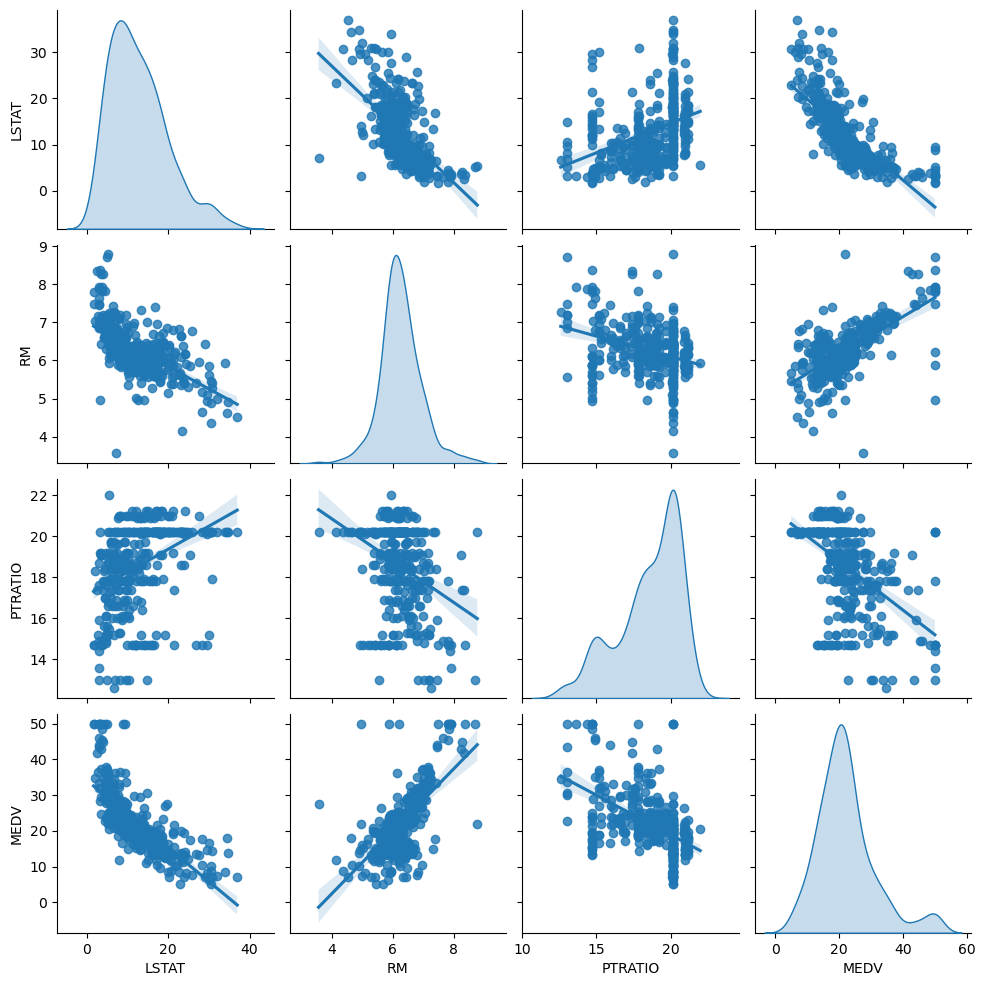

In [29]:
# Plot de Train

import pandas as pd 
import numpy as np

train_dataset = X_train.copy()  
train_dataset.insert(13, "MEDV", y_train)    # Añadimos columna Y ( target) en Y_train
_ = sns.pairplot(train_dataset[['LSTAT','RM','PTRATIO','MEDV']], kind="reg", diag_kind="kde")  # Hemos visto por corr que target( Y =  MEDV ) está principalmente correlacionado con:
            #  LSTAT (- 0,737)    RM = (-0,695)    PRATIO = (-0,50)

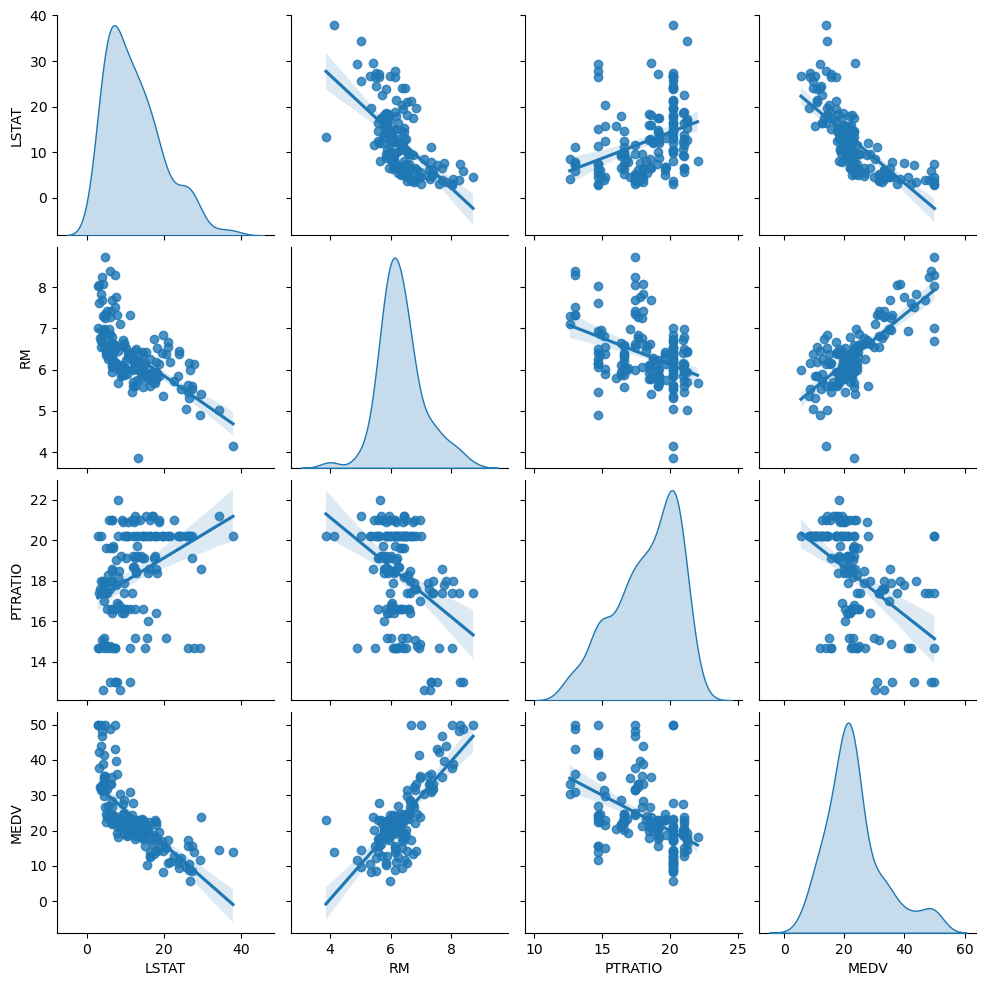

In [30]:
# Plot de Test

test_dataset = X_test.copy()
test_dataset.insert(13, "MEDV", y_test)      # Añadimos columna Y( target) en Y_test
_ = sns.pairplot(test_dataset[['LSTAT','RM','PTRATIO','MEDV']], kind="reg", diag_kind="kde")


Train y Test conservan las formas aparentemente...veamos describe()

In [26]:
train_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.816603,11.353562,11.035251,0.058047,0.553897,6.242142,68.718997,3.815769,9.366755,403.150396,18.511346,356.899393,12.704090,22.272032
std,9.491268,23.291466,6.812168,0.234142,0.115265,0.710222,28.377757,2.153043,8.648335,168.819590,2.119874,91.788765,7.143035,8.965537
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082545,0.000000,5.160000,0.000000,0.451000,5.875000,45.050000,2.067750,4.000000,277.000000,17.500000,375.115000,7.025000,16.700000
50%,0.249800,0.000000,9.690000,0.000000,0.538000,6.172000,78.300000,3.272100,5.000000,330.000000,19.100000,391.980000,11.380000,21.100000
75%,3.504645,12.500000,18.100000,0.000000,0.624000,6.566000,94.100000,5.116700,24.000000,666.000000,20.200000,396.235000,17.025000,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
test_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.007484,11.393701,11.439764,0.102362,0.557078,6.411441,68.144882,3.733190,10.094488,423.417323,18.288976,356.001496,12.500787,23.311024
std,5.078065,23.507144,7.020744,0.304325,0.118115,0.666121,27.560516,1.964516,8.893044,167.434206,2.294826,90.161060,7.161264,9.851937
min,0.013600,0.000000,0.460000,0.000000,0.400000,4.926000,2.900000,1.129600,1.000000,188.000000,12.600000,6.680000,1.920000,6.300000
25%,0.080885,0.000000,5.320000,0.000000,0.447500,5.971500,44.650000,2.132250,4.000000,293.000000,16.600000,375.600000,6.965000,17.300000
50%,0.318270,0.000000,9.690000,0.000000,0.524000,6.302000,76.000000,3.112100,5.000000,384.000000,18.800000,390.950000,11.280000,21.600000
75%,3.944055,12.500000,18.100000,0.000000,0.624000,6.788000,93.400000,5.229650,24.000000,666.000000,20.200000,395.680000,16.665000,27.500000
max,25.940600,95.000000,27.740000,1.000000,0.871000,8.725000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.020000,50.000000


Comparando ambos Sets TRAIN/ TEST vemos  :

-que las medias, varianzas, etc NO tiene porque ser iguales entre TRAIN/ TEST..deberían serlo idealmente. Hemos partido 80/20..quizás deberíamos probar 70/30 para que los estadísticos sean más parecidos.

-cada vez que ejecutamos la partición de nuevo (SPLIT) el dataset cambia, evidentemente, y cambian sus estadísticas. 
Podríamos fijar el test con el argumento  random_state = 1 para que el experimento fuera siempre igual.













- EXERCICI 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).


In [32]:
X_train.head() # ..para recordar las columnas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
134,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437.0,21.2,262.76,17.31
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
70,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305.0,19.2,383.73,6.72
470,4.34879,0.0,18.10,0,0.580,6.167,84.0,3.0334,24,666.0,20.2,396.90,16.29
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432.0,17.8,391.50,13.61


In [39]:
#Dummies

# Vemos que hay dos variables INTEGER : CHAS y RAD , pero CHAS en sí es una Dummie, así que crearemos columnas dummies sobre RAD



from sklearn import preprocessing
from sklearn import utils
import pandas as pd

X_train1 = pd.get_dummies(data=train_dataset, columns=['RAD'])
X_test1 = pd.get_dummies(data=test_dataset, columns=['RAD'])


X_train1['Price'] = X_train1['MEDV']   # Pasamos MEDV como Price al final como variable target de nuevo tras las nuevas columnas Dummies

X_test1['Price'] = X_test1['MEDV']

X_train1.head(3)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,Price
134,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,437.0,21.2,...,0,0,0,1,0,0,0,0,0,15.6
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,1,0,0,0,0,0,0,0,0,24.0
70,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,305.0,19.2,...,0,0,0,1,0,0,0,0,0,24.2


In [40]:
# StandardScaler  


from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

Scaled_Xtrain = StandardScaler().fit_transform(X_train1)
Scaled_Xtest  = StandardScaler().fit_transform(X_test1)



print(Scaled_Xtrain.std(axis=0) ,Scaled_Xtrain.mean(axis=0)) 

# Std = 1  y  media = 0  ...Scaler

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [ 6.02154861e-17  2.00718287e-17 -8.02873148e-17  5.26885503e-17
 -7.52693576e-17 -1.04875305e-15  5.01795717e-18 -2.10754201e-16
  9.53411863e-17  1.37492027e-15 -4.11472488e-16  1.45520758e-16
  4.01436574e-17  0.00000000e+00 -2.50897859e-17  3.76346788e-17
 -8.53052719e-17  1.15413015e-16 -1.55243050e-17  0.00000000e+00
 -2.50897859e-18  1.00359143e-16  4.01436574e-17]


In [41]:
print(Scaled_Xtest.std(axis=0) ,Scaled_Xtest.mean(axis=0)) 


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [-3.50596745e-17 -4.67462326e-17  3.15537070e-16  1.16865582e-17
 -1.46081977e-16  2.33731163e-17  6.42760698e-17 -2.74634117e-16
  8.76491862e-18  8.35588908e-16  3.50596745e-17  1.05179023e-16
  2.22044605e-16  0.00000000e+00  2.33731163e-17  2.33731163e-17
 -1.16865582e-17 -5.25895117e-17  2.33731163e-17  0.00000000e+00
  8.76491862e-18  4.09029535e-17  2.22044605e-16]


<Figure size 1500x1000 with 0 Axes>

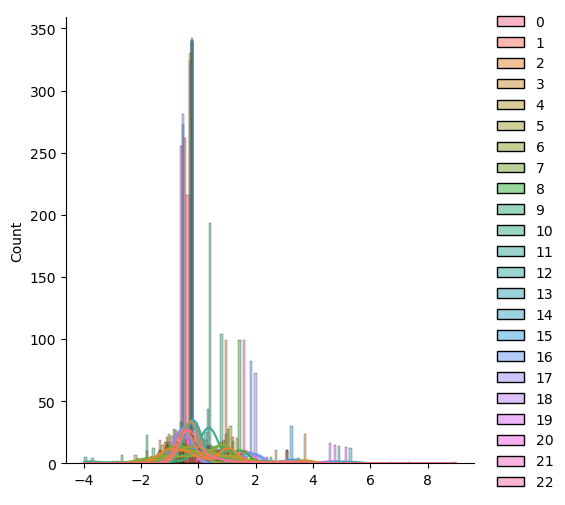

In [42]:
# plot de Scaled_XTrain

import matplotlib.pyplot  as plt


fig= plt.figure(figsize=(15,10))


sns.displot(Scaled_Xtrain, kde= True) 

# Vemos como Scaler a escalado las medias a 0 con Std =  1


In [43]:
#max_abs_scaler

max_abs_scaler = preprocessing.MaxAbsScaler()

X_train_maxabs = max_abs_scaler.fit_transform(X_train1)


X_test_maxabs = max_abs_scaler.fit_transform(X_test1)





<Figure size 800x400 with 0 Axes>

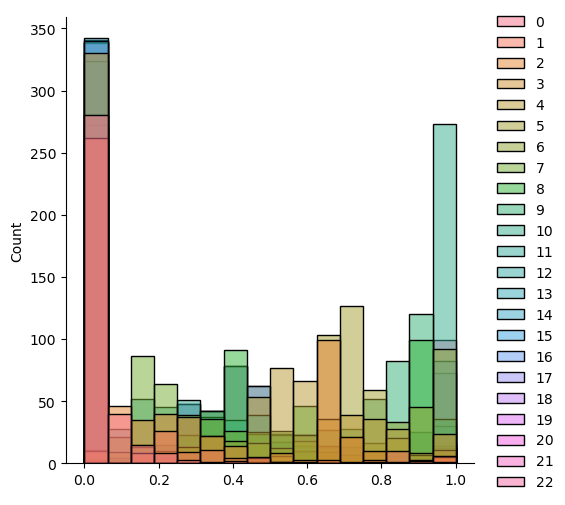

In [44]:
# Plot de X_train_maxabs


fig= plt.figure(figsize=(8,4))

sns.displot(X_train_maxabs) # Los escala todos al rango 1


<Figure size 800x400 with 0 Axes>

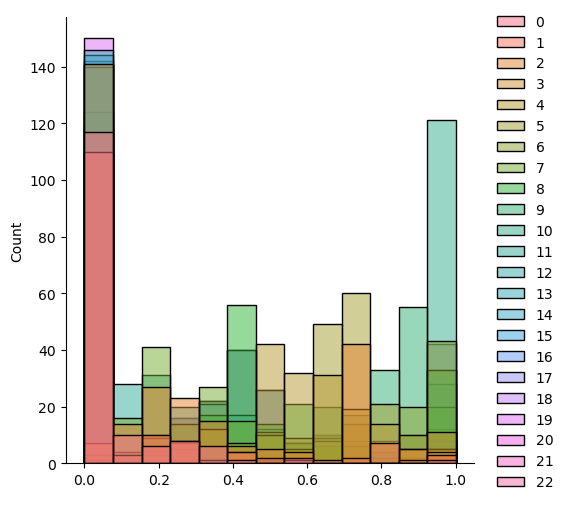

In [45]:
# Plot de X_test_maxabs


fig= plt.figure(figsize=(8,4))

sns.displot(X_test_maxabs) # Los escala todos al rango 1


In [46]:
print(X_train_maxabs.std(axis=0) ,    X_train_maxabs.mean(axis=0))      #             

[0.10647521 0.23659071 0.24788615 0.25139656 0.13483226 0.07732016
 0.28214796 0.17159493 0.2421696  0.09493259 0.22658677 0.19074179
 0.17961049 0.19489478 0.18096743 0.278503   0.4218792  0.40458644
 0.20773759 0.20143838 0.18808129 0.44883263 0.17961049] [0.04419906 0.11402022 0.40820431 0.06779661 0.6400877  0.71280549
 0.68856497 0.31098938 0.58721304 0.84292501 0.90050576 0.34511631
 0.44276836 0.03954802 0.03389831 0.08474576 0.23163842 0.20621469
 0.04519774 0.04237288 0.03672316 0.27966102 0.44276836]


In [47]:
#Normalizer     ( ...Scaling inputs to units, mean = 0)

from sklearn.preprocessing import Normalizer

normalizer_train = Normalizer().fit_transform(X_train1)  
normalizer_test = Normalizer().fit_transform(X_test1)  


normalizer_train.std(axis=0), normalizer_train.mean(axis=0), 

(array([1.28757302e-02, 4.52777995e-02, 1.02555255e-02, 4.65459389e-04,
        1.82876918e-04, 2.63416476e-03, 4.79262267e-02, 4.56781788e-03,
        1.53851574e-01, 5.86692079e-03, 2.08690921e-01, 1.09411044e-02,
        2.02370835e-02, 3.96759668e-04, 3.82965692e-04, 5.94440766e-04,
        8.24181456e-04, 7.94846210e-04, 3.72116689e-04, 4.04770717e-04,
        3.78448217e-04, 6.03928925e-04, 2.02370835e-02]),
 array([5.49136265e-03, 2.17544852e-02, 1.87549442e-02, 1.23418504e-04,
        9.78432552e-04, 1.13164065e-02, 1.19397728e-01, 7.14886078e-03,
        6.95686784e-01, 3.30356573e-02, 6.50338199e-01, 2.17910450e-02,
        4.10976040e-02, 8.03277341e-05, 7.15940687e-05, 1.80446965e-04,
        4.48170332e-04, 4.03377061e-04, 8.07701570e-05, 8.50362945e-05,
        7.38785776e-05, 3.75398217e-04, 4.10976040e-02]))

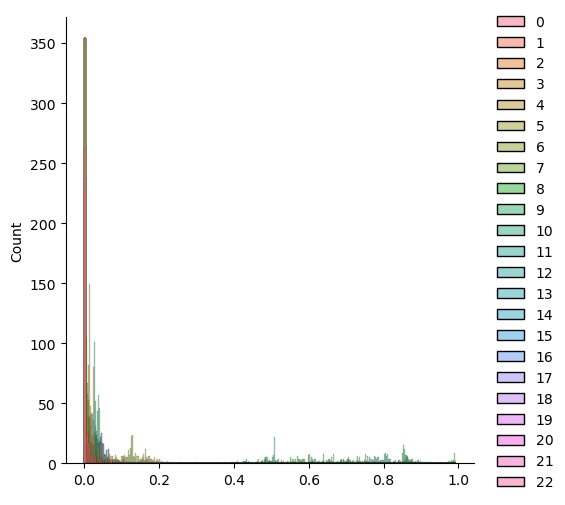

In [48]:
sns.displot(normalizer_train)    #  ( ...Scaling inputs to units, mean = 0)